In [4]:
%pip install pandas openpyxl

import pandas as pd

file_path = r"C:\Users\HP\Desktop\1730285881-Airbnb_Open_Data.xlsx"

try:
    df = pd.read_excel(file_path)
    print("\nFile successfully loaded! You are ready for analysis.")
except Exception as e:
    print(f"\nFATAL ERROR: Failed to load file: {e}")


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.

File successfully loaded! You are ready for analysis.


In [5]:
# Verify the load and column structure
print("--- DataFrame Info (Check for 20+ columns) ---")
df.info()

# --- 1. Data Cleaning (Convert Price/Fee to Numbers) ---
# Remove '$' and ',' then convert to a numeric type (float)
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')

# --- 2. Handle missing data ---
# Fill missing prices/fees with the median (a safe measure)
df['price'].fillna(df['price'].median(), inplace=True)
df['service fee'].fillna(df['service fee'].median(), inplace=True)

# Drop rows where critical categorical data is missing
df.dropna(subset=['neighbourhood group', 'room type'], inplace=True)

# --- 3. Final Check ---
print("\n--- First 5 Rows After Cleaning ---")
df.head()

--- DataFrame Info (Check for 20+ columns) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country c

C:\Users\HP\AppData\Local\Temp\ipykernel_16140\3244838386.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16140\3244838386.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN



--- Average Price by Neighbourhood Group ---
neighbourhood group
Queens           630.192206
Bronx            627.756637
Brooklyn         626.556498
Staten Island    624.489005
Manhattan        622.444145
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


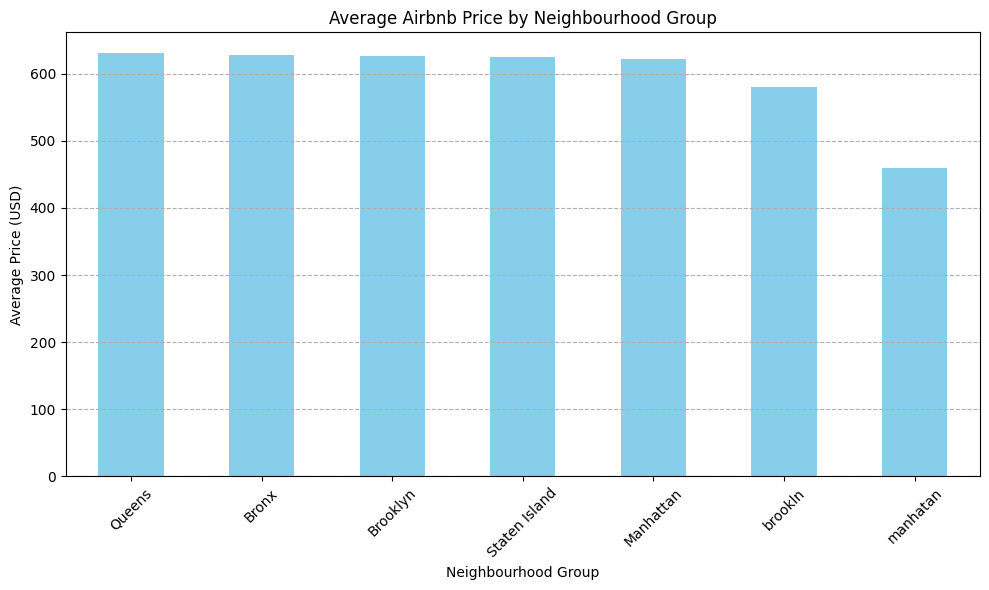

In [7]:
# Calculate the average price for each neighbourhood group and sort them
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

print("\n--- Average Price by Neighbourhood Group ---")
print(avg_price)

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Airbnb Price by Neighbourhood Group')
plt.ylabel('Average Price (USD)')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('avg_price_by_group.png') # Save the plot as an image


--- Answer to Question 1: Different Property (Room) Types ---
room type
Entire home/apt    53690
Private room       46538
Shared room         2226
Hotel room           116
Name: count, dtype: int64


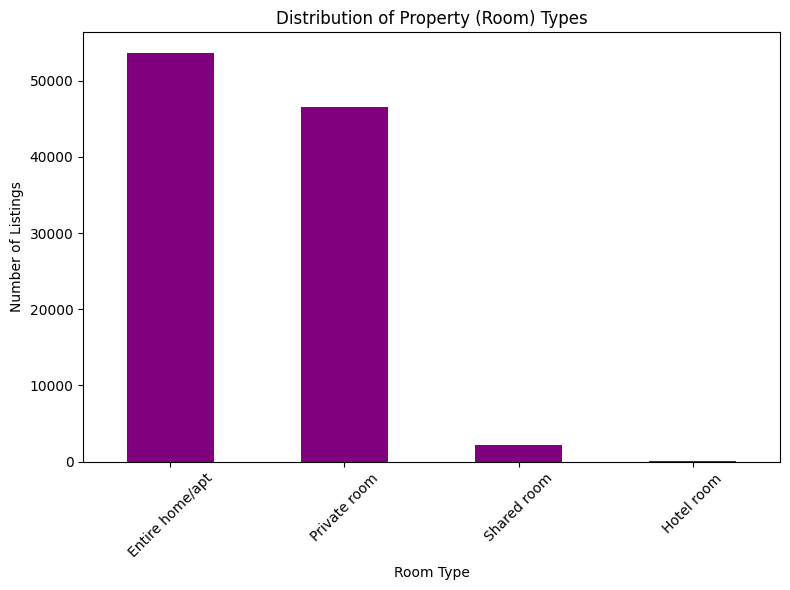

In [6]:
import matplotlib.pyplot as plt

# Code to answer Question 1: Different property types (room types)
print("\n--- Answer to Question 1: Different Property (Room) Types ---")
property_types = df['room type'].value_counts()
print(property_types)

# Visualize the property types
plt.figure(figsize=(8, 6))
property_types.plot(kind='bar', color='purple')
plt.title('Distribution of Property (Room) Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() # This will display the image


--- Answer to Question 2: Neighbourhood Group with Most Listings ---
neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64


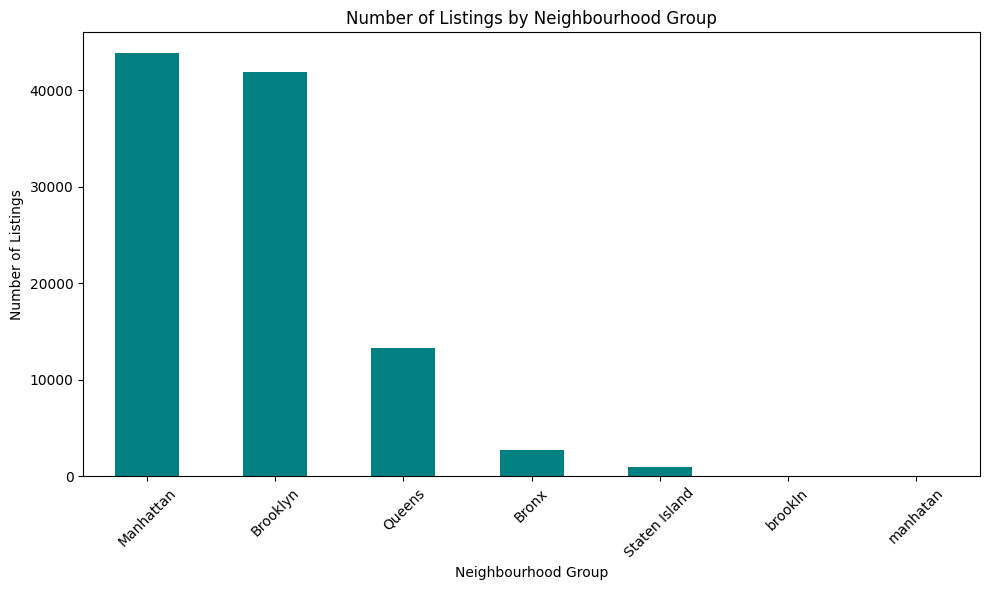

In [8]:
# Code to answer Question 2: Neighbourhood Group with Highest Number of Listings
print("\n--- Answer to Question 2: Neighbourhood Group with Most Listings ---")
listings_by_neighbourhood_group = df['neighbourhood group'].value_counts().sort_values(ascending=False)
print(listings_by_neighbourhood_group)

# Visualize the number of listings by neighbourhood group
plt.figure(figsize=(10, 6))
listings_by_neighbourhood_group.plot(kind='bar', color='teal')
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Answer to Question 3: ACCURATE Average Price by Neighbourhood Group ---
neighbourhood group
Queens           630.192206
Bronx            627.756637
Brooklyn         626.556498
Staten Island    624.489005
Manhattan        622.444145
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


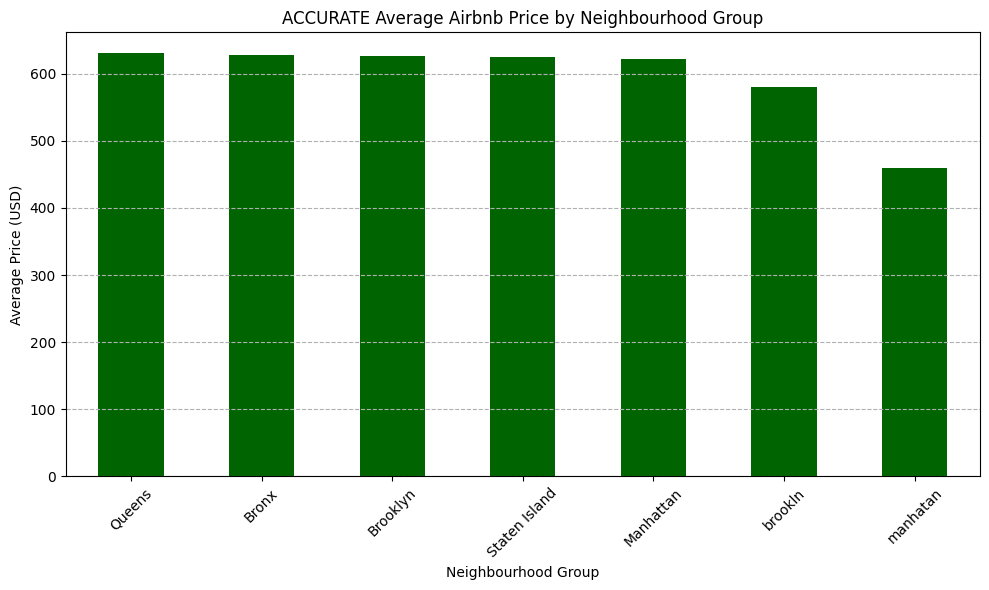

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Load your data if not already done
# df = pd.read_csv('your_airbnb_data.csv')

# Ensure 'price' is numeric and drop missing values
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price', 'neighbourhood group'])

# Calculate average price by neighbourhood group
avg_price_cleaned = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

print("\n--- Answer to Question 3: ACCURATE Average Price by Neighbourhood Group ---")
print(avg_price_cleaned)

# Plot the results
plt.figure(figsize=(10, 6))
avg_price_cleaned.plot(kind='bar', color='darkgreen')
plt.title('ACCURATE Average Airbnb Price by Neighbourhood Group')
plt.ylabel('Average Price (USD)')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


--- Answer to Question 4: Host with the Highest Number of Listings ---
host id
29854052016    2
22421720525    2
6853287861     2
11750337247    2
23765993225    2
Name: id, dtype: int64


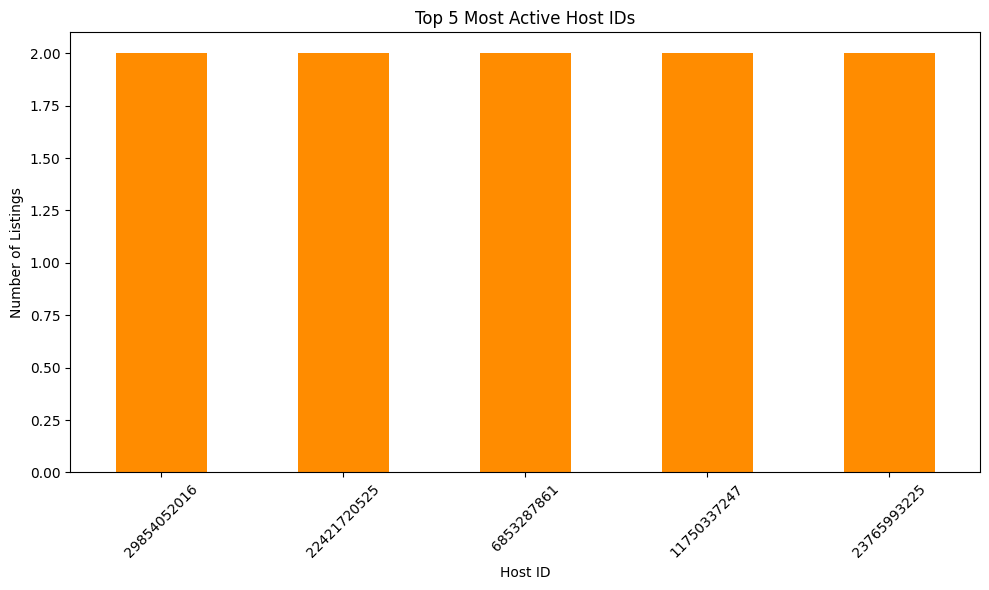

In [9]:
import matplotlib.pyplot as plt

# Code to answer Question 4: Most active host
print("\n--- Answer to Question 4: Host with the Highest Number of Listings ---")

# The 'calculated host listings count' column is often used, but counting the 'id'
# grouped by 'host id' is more accurate for the current dataset.
top_hosts = df.groupby('host id')['id'].count().sort_values(ascending=False).head(5)
print(top_hosts)

# Visualize the top 5 hosts
plt.figure(figsize=(10, 6))
top_hosts.plot(kind='bar', color='darkorange')
plt.title('Top 5 Most Active Host IDs')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() # This will display the image for Q4


--- Answer to Question 5: Price Distribution (Histogram) ---


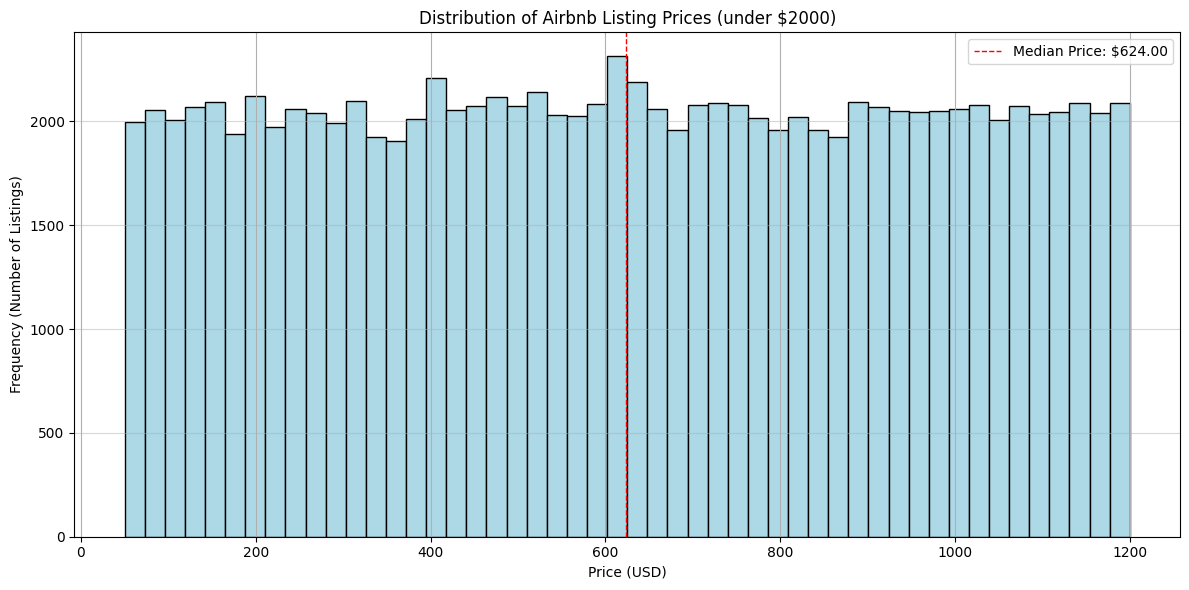

In [19]:
# Code to answer Question 5: Price Distribution
print("\n--- Answer to Question 5: Price Distribution (Histogram) ---")

plt.figure(figsize=(12, 6))
# We limit the price to a reasonable value (e.g., $2000) to exclude extreme outliers
# and make the histogram readable.
df[df['price'] < 2000]['price'].hist(bins=50, color='lightblue', edgecolor='black')

plt.title('Distribution of Airbnb Listing Prices (under $2000)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency (Number of Listings)')
plt.axvline(df['price'].median(), color='red', linestyle='dashed', linewidth=1, label=f"Median Price: ${df['price'].median():.2f}")
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show() # This will display the image for Q5


--- Answer to Question 6: Average Minimum Nights by Room Type ---
room type
Entire home/apt    9.808533
Shared room        6.600540
Private room       6.288466
Hotel room         4.131579
Name: minimum nights, dtype: float64


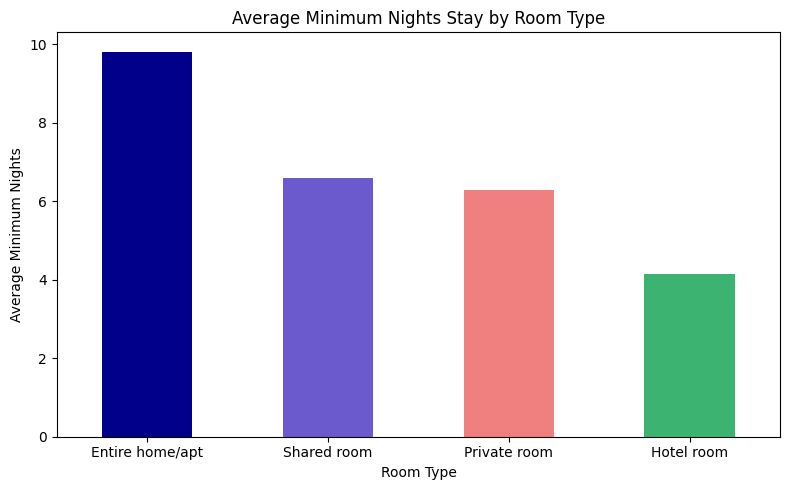

In [16]:
# Code to answer Question 6: Average Minimum Nights by Room Type
print("\n--- Answer to Question 6: Average Minimum Nights by Room Type ---")

# Calculate the mean 'minimum nights' for each 'room type'
avg_min_nights = df.groupby('room type')['minimum nights'].mean().sort_values(ascending=False)
print(avg_min_nights)

# Visualize the average minimum nights
plt.figure(figsize=(8, 5))
avg_min_nights.plot(kind='bar', color=['darkblue', 'slateblue', 'lightcoral', 'mediumseagreen'])
plt.title('Average Minimum Nights Stay by Room Type')
plt.ylabel('Average Minimum Nights')
plt.xlabel('Room Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show() # This will display the image for Q6


--- Answer to Question 7: Average Price by Review Rate ---
review rate number
1.0    626.671554
2.0    626.629731
3.0    626.078719
4.0    626.779274
5.0    621.504323
Name: price, dtype: float64


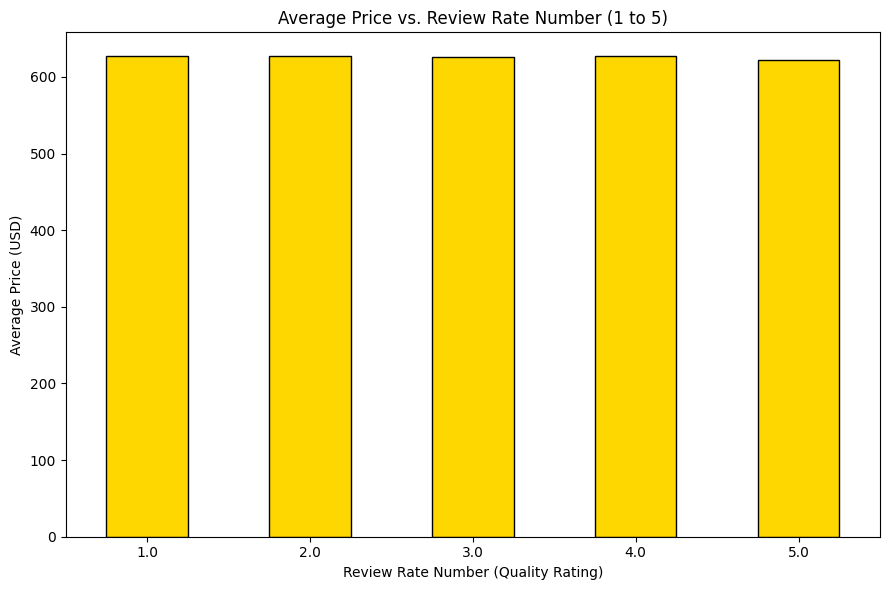

In [ ]:
# Code to answer Question 7: Price vs. Review Rate

# Filter out null values for clean comparison
df_reviews = df.dropna(subset=['review rate number', 'price'])

# Calculate the average price for each review rate number
avg_price_by_review = df_reviews.groupby('review rate number')['price'].mean().sort_index()

print("\n--- Answer to Question 7: Average Price by Review Rate ---")
print(avg_price_by_review)

# Visualize the price by review rate
plt.figure(figsize=(9, 6))
avg_price_by_review.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Average Price vs. Review Rate Number (1 to 5)')
plt.xlabel('Review Rate Number (Quality Rating)')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show() 


--- Answer to Question 8: Average Availability by Cancellation Policy ---
cancellation_policy
strict      141.667697
flexible    141.075640
moderate    140.537310
Name: availability 365, dtype: float64


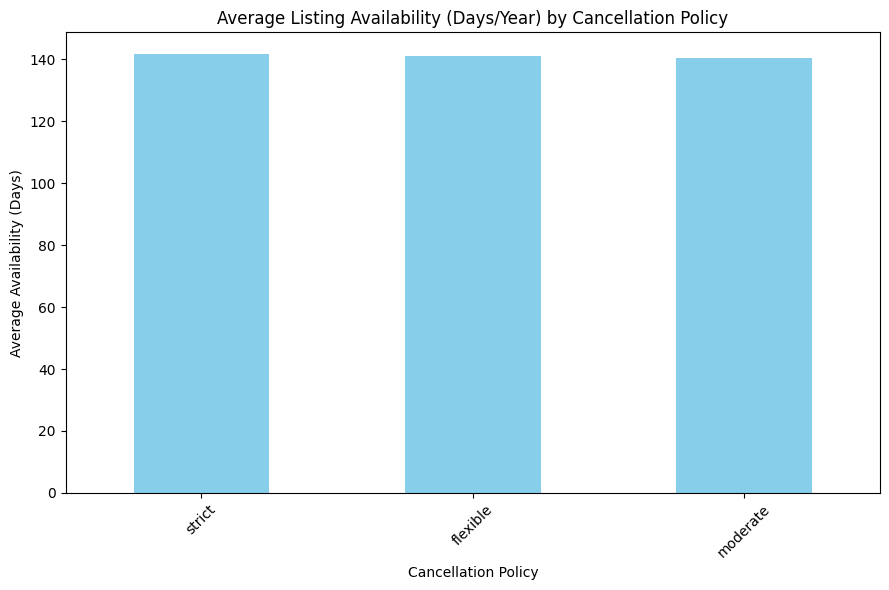

In [12]:
# Code to answer Question 8: Availability vs. Cancellation Policy

# Calculate the average 'availability 365' for each cancellation policy
avg_availability = df.groupby('cancellation_policy')['availability 365'].mean().sort_values(ascending=False)

print("\n--- Answer to Question 8: Average Availability by Cancellation Policy ---")
print(avg_availability)

# Visualize the average availability
plt.figure(figsize=(9, 6))
avg_availability.plot(kind='bar', color='skyblue')
plt.title('Average Listing Availability (Days/Year) by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Average Availability (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() # This will display the image for Q8


--- Answer to Question 9: Average Price by Construction Decade ---
Decade
2000s    627.436351
2010s    623.477775
2020s    626.522868
Name: price, dtype: float64


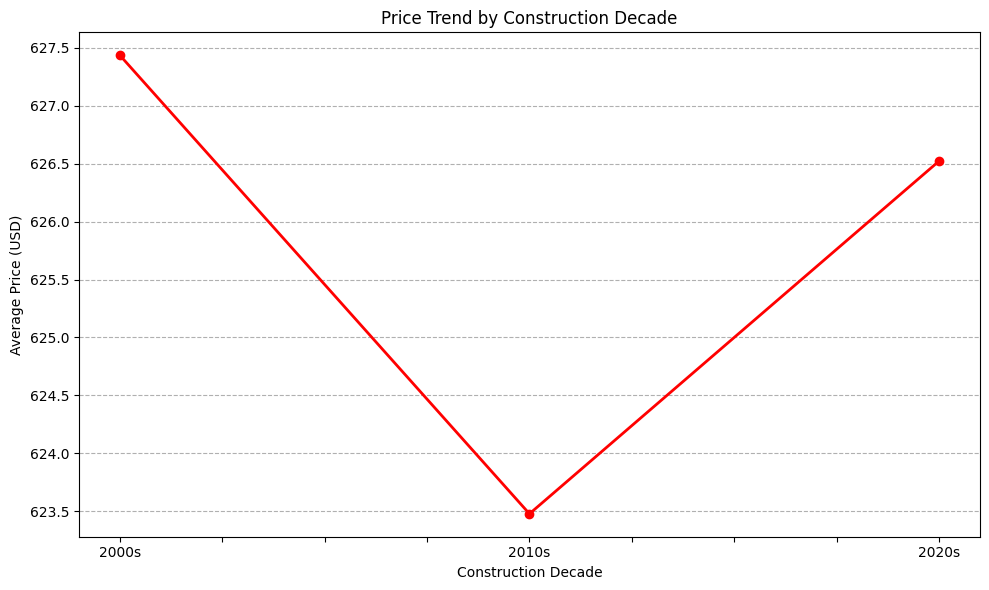

In [13]:
# Code to answer Question 9: Price Trend by Construction Year

# 1. Convert 'Construction year' to integers and drop nulls
df_year = df.dropna(subset=['Construction year', 'price']).copy()
df_year['Construction year'] = df_year['Construction year'].astype(int)

# 2. Group years into decades (e.g., 2007 -> 2000s) for trend clarity
df_year['Decade'] = (df_year['Construction year'] // 10) * 10
df_year['Decade'] = df_year['Decade'].astype(str) + 's'

# 3. Calculate average price by decade
avg_price_by_decade = df_year.groupby('Decade')['price'].mean().sort_index()

print("\n--- Answer to Question 9: Average Price by Construction Decade ---")
print(avg_price_by_decade)

# Visualize the price trend
plt.figure(figsize=(10, 6))
avg_price_by_decade.plot(kind='line', marker='o', color='red', linewidth=2)
plt.title('Price Trend by Construction Decade')
plt.xlabel('Construction Decade')
plt.ylabel('Average Price (USD)')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show() # This will display the image for Q9


--- Answer to Question 10: Average Price by Host Identity Verification ---
host_identity_verified
unconfirmed    626.640828
verified       623.853207
Name: price, dtype: float64


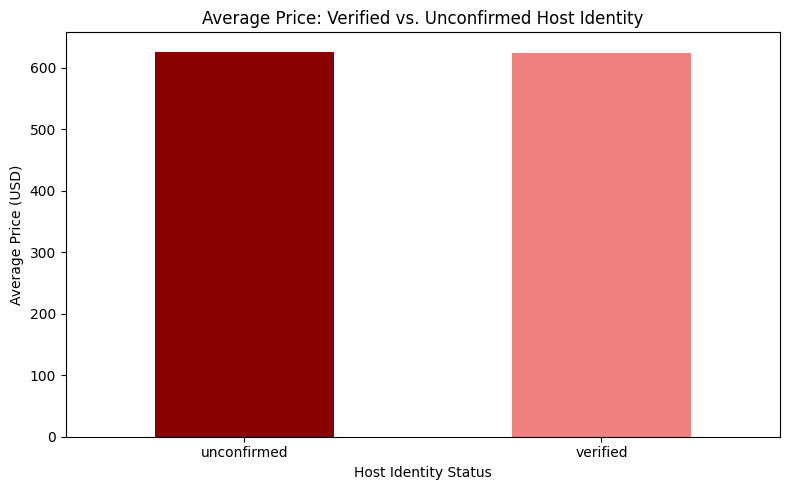

In [14]:
# Code to answer Question 10: Price difference by host verification status

# Calculate the average price for each host identity verification status
avg_price_by_verification = df.groupby('host_identity_verified')['price'].mean().sort_values(ascending=False)

print("\n--- Answer to Question 10: Average Price by Host Identity Verification ---")
print(avg_price_by_verification)

# Visualize the comparison
plt.figure(figsize=(8, 5))
avg_price_by_verification.plot(kind='bar', color=['darkred', 'lightcoral', 'grey'])
plt.title('Average Price: Verified vs. Unconfirmed Host Identity')
plt.xlabel('Host Identity Status')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show() # This will display the image for Q10


--- Answer to Question 11: Correlation (Reviews Per Month vs. Price) ---
Pearson Correlation Coefficient: 0.0042


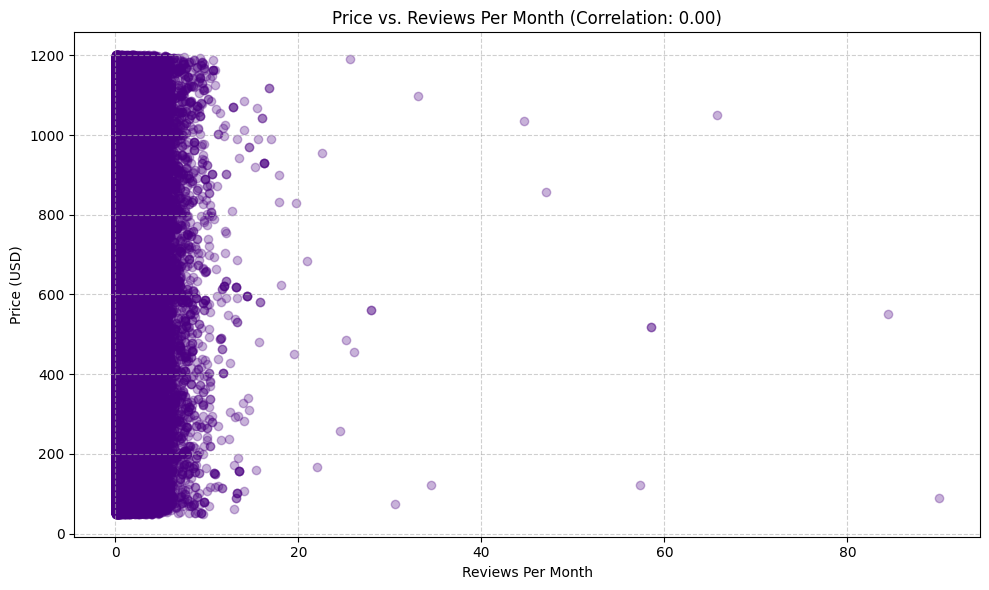

In [15]:
# Code to answer Question 11: Correlation between Reviews Per Month and Price

# Filter data to exclude extreme price outliers for a readable chart
df_filtered = df[df['price'] < 1500].dropna(subset=['reviews per month'])

# Calculate the correlation coefficient
correlation = df_filtered['reviews per month'].corr(df_filtered['price'])
print(f"\n--- Answer to Question 11: Correlation (Reviews Per Month vs. Price) ---")
print(f"Pearson Correlation Coefficient: {correlation:.4f}")

# Visualize the correlation with a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['reviews per month'], df_filtered['price'], alpha=0.3, color='indigo')
plt.title(f'Price vs. Reviews Per Month (Correlation: {correlation:.2f})')
plt.xlabel('Reviews Per Month')
plt.ylabel('Price (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # This will display the image for Q11


--- Answer to Question 12: Top 5 Most Expensive Neighborhoods (Min 10 Listings) ---
neighbourhood
Jamaica Hills    812.904762
Midland Beach    796.176471
Shore Acres      792.260870
Mill Basin       775.142857
Riverdale        768.736842
Name: price, dtype: float64


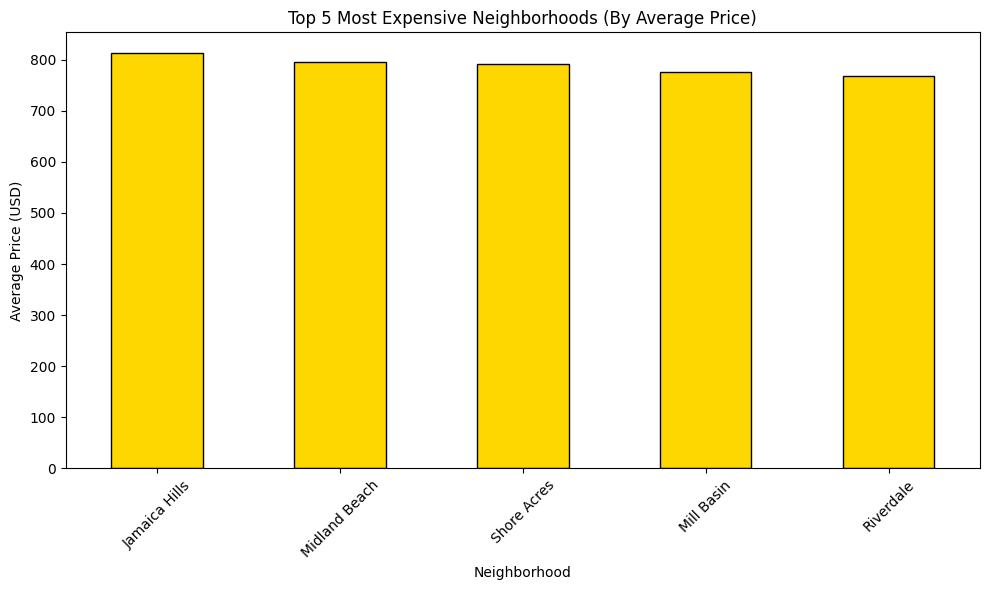

In [18]:
import matplotlib.pyplot as plt

# Ensure 'price' is numeric and drop missing values (skip this if already cleaned)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price', 'neighbourhood'])

# Calculate the average price for each neighborhood
avg_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean()

# Filter for neighborhoods that have at least 10 listings
neigh_counts = df['neighbourhood'].value_counts()
valid_neighborhoods = neigh_counts[neigh_counts >= 10].index

# Select only valid neighborhoods for top 5 expensive ones
top_5_expensive = avg_price_by_neighborhood.loc[valid_neighborhoods].nlargest(5)

print("\n--- Answer to Question 12: Top 5 Most Expensive Neighborhoods (Min 10 Listings) ---")
print(top_5_expensive)

# Plot the results
plt.figure(figsize=(10, 6))
top_5_expensive.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Top 5 Most Expensive Neighborhoods (By Average Price)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()